# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [1]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

#### The main functino that creates points object

In [2]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

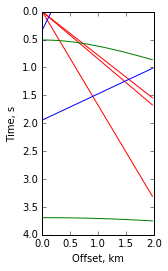

In [3]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

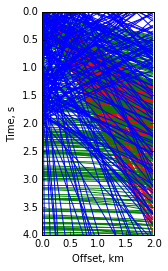

In [4]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [5]:
events2

[[0, 1.297094333279078, 0, 'D'],
 [0, 1.3787804226638007, 0, 'D'],
 [0, 0.8883143495519735, 0, 'D'],
 [0, 1.2914213978499447, 0, 'D'],
 [0, 1.1762047065418613, 0, 'D'],
 [0, 0.9727488421297902, 0, 'D'],
 [0, 1.4848084046595156, 0, 'D'],
 [0, 1.3810380351379183, 0, 'D'],
 [0, 1.22932153237281, 0, 'D'],
 [0, 1.3129067785388466, 0, 'D'],
 [0, 1.209640093055666, 0, 'D'],
 [0, 1.0156014378372062, 0, 'D'],
 [0, 1.4607935079312793, 0, 'D'],
 [0, 1.1793359993018397, 0, 'D'],
 [0, 0.8501682961053658, 0, 'D'],
 [0, 1.3793919085283473, 0, 'D'],
 [0, 0.9900479659442037, 0, 'D'],
 [0, 0.5769681829480573, 0, 'D'],
 [0, 0.7905485880988004, 0, 'D'],
 [0, 1.4084993116897706, 0, 'D'],
 [0, 0.5045726396630249, 0, 'D'],
 [0, 0.5608665880883622, 0, 'D'],
 [0, 1.2758733173377506, 0, 'D'],
 [0, 0.9310871162094724, 0, 'D'],
 [0, 1.2461882731161291, 0, 'D'],
 [0, 0.7949776068572137, 0, 'D'],
 [0, 1.0407013246551102, 0, 'D'],
 [0, 1.2535606399984156, 0, 'D'],
 [0, 1.426597828923368, 0, 'D'],
 [0, 0.519225198473

In [6]:
events

[[0, 0.5967304228296955, 0, 'D'],
 [0, 1.2787142105552003, 0, 'D'],
 [0, 1.1808202082439128, 0, 'D'],
 [3.692768711548436, 2.9988778324253986, 1, 'R'],
 [0.5086871723972961, 2.8337122237394006, 1, 'R'],
 [1.944168796008134, -2.130075025861061, 0, 'N'],
 [0.3325341119986396, -0.49439917744942363, 0, 'N'],
 [-1.794650711436145, 1.2819771866471568, 0, 'N']]

In [7]:
events[0]

[0, 0.5967304228296955, 0, 'D']

In [8]:
events[0][0]

0

In [9]:
def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    eventsDict['events'] = []
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
#         eventsDict['direct'].append(each[0])
#         eventsDict['reflected'].append(each[1])
#         eventsDict['coherentnoise'].append(each[2])
         eventsDict['events'].append(each[0:3])
         labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)




In [10]:
testEvents = makeEventsDict(events)
print(testEvents)

({'events': [[0, 0.5967304228296955, 0], [0, 1.2787142105552003, 0], [0, 1.1808202082439128, 0], [3.692768711548436, 2.9988778324253986, 1], [0.5086871723972961, 2.8337122237394006, 1], [1.944168796008134, -2.130075025861061, 0], [0.3325341119986396, -0.49439917744942363, 0], [-1.794650711436145, 1.2819771866471568, 0]], 'reflected': [], 'coherentnoise': [], 'direct': []}, {'label': ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']})


In [11]:
eventsDict = testEvents[0]
labelsDict = testEvents[1]

In [12]:
from sklearn import svm

In [13]:
from sklearn import svm
SVC = svm.SVC()
import matplotlib.pyplot as plt

In [14]:
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = svm.SVC()
# clf.fit(X, y)  
X = eventsDict['events']
print("X = ",X)
y = labelsDict['label']
print("y = ",y)
clf = svm.SVC()
clf.fit(X, y) 

X =  [[0, 0.5967304228296955, 0], [0, 1.2787142105552003, 0], [0, 1.1808202082439128, 0], [3.692768711548436, 2.9988778324253986, 1], [0.5086871723972961, 2.8337122237394006, 1], [1.944168796008134, -2.130075025861061, 0], [0.3325341119986396, -0.49439917744942363, 0], [-1.794650711436145, 1.2819771866471568, 0]]
y =  ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
clf.predict([[0,1.34,0]])

array(['D'], 
      dtype='<U1')

#### SUCCESS !! really really easy success, but at least it didn't do anything obviously wrong!

In [16]:
# get support vectors
clf.support_vectors_

array([[ 0.        ,  0.59673042,  0.        ],
       [ 0.        ,  1.27871421,  0.        ],
       [ 0.        ,  1.18082021,  0.        ],
       [ 1.9441688 , -2.13007503,  0.        ],
       [ 0.33253411, -0.49439918,  0.        ],
       [-1.79465071,  1.28197719,  0.        ],
       [ 3.69276871,  2.99887783,  1.        ],
       [ 0.50868717,  2.83371222,  1.        ]])

In [17]:
# get indices of support vectors
clf.support_ 

array([0, 1, 2, 5, 6, 7, 3, 4], dtype=int32)

In [18]:
# get number of support vectors for each class
clf.n_support_ 

array([3, 3, 2], dtype=int32)

In [19]:
# This function combines several of the smaller lines above
# It takes a events list, turns it into two dictionaries combined, splits that into two arrays for X and Y
# trains a SVM label on them and then returns that model output details
# The model will need to be run on a input for a prediction

def comboFunctionA(events):
    testEvents = makeEventsDict(events)
    eventsDict = testEvents[0]
    labelsDict = testEvents[1]
    X = eventsDict['events']
#     print("X = ",X)
    y = labelsDict['label']
#     print("y = ",y)
    clf = svm.SVC()
    output = clf.fit(X, y)
    return(output)
    

In [20]:
# runs the function above and make a prediction
tempAnswer = comboFunctionA(events2)
tempAnswer

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
events2Model = tempAnswer

In [22]:
# requests a prediction from the model
clf.predict([[0,1.34,0],[0,1.4,0.2]])

array(['D', 'D'], 
      dtype='<U1')

In [23]:
# requests a prediction from the model
clf.predict([[-1.190348857444183, -0.8156719314845455, 0]])

array(['N'], 
      dtype='<U1')

Both of the two predictions above were correct

In [24]:
## events2Model = tempAnswer = comboFunctionA(events2)

def testUnseenEvents__OLD(model,eventsDict):
    score = {}
    score['result'] = []
    score['test'] = []
    score['isCorrect'] = []
    x = 0
    print(eventsDict)
    for each in (eventsDict):
#         print("each",each)
#         print("each['events']" each['events'])
        prediction = model.predict(each['events'])
        print("prediction",prediction)
        print("labelsDict",eventsDict)
        print(eventsDict['label'])
        if prediction == eventsDict['label'][x]:
            isCorrect = "True"
        else:
            isCorrect = "False"
#         print(prediction == eventsDict['label']:
        score['result'].append(prediction)
        score['test'].append(each)
        score['isCorrect'].append(isCorrect)
        x = x + 1
    return(score)  

In [25]:

#
def testUnseenEvents(model,eventsDict):
    score = {}
    score['result'] = []
    score['test'] = []
    score['isCorrect'] = []
    x = 0
#     eventsTest_eventsDict = eventsDict[0]['events']
#     eventsTest_labelsDict = eventsDict[1]['label']
    i = 0
    while i < len(eventsDict[0]['events']):
        each = i
#         print("each",each)
        eventsTest_eventsDict = eventsDict[0]['events']
        eventsTest_labelsDict = eventsDict[1]['label']
#         print("eventsTest_eventsDict",eventsTest_eventsDict)
#         print("eventsTest_labelsDict",eventsTest_labelsDict)
#         print("eventsTest_eventsDict[i]",eventsTest_eventsDict[i])
#         print("eventsTest_labelsDict[i]",eventsTest_labelsDict[i])
        prediction = model.predict(eventsTest_eventsDict[i])
        if prediction == eventsDict[1]['label'][i]:
            isCorrect = "True"
        else:
            isCorrect = "False"
        score['result'].append(prediction)
        score['test'].append(each)
        score['isCorrect'].append(isCorrect)
        i += 1
    return(score)  

In [26]:
events3=points_gen(300,200,300)

In [27]:
events3_testEvents = makeEventsDict(events3)
events3_eventsDict = testEvents[0]
events3_labelsDict = testEvents[1]

In [28]:
# events3Model = comboFunctionA(events2)

In [29]:
answer = testUnseenEvents(events2Model,events3_testEvents)
answer

/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

{'isCorrect': ['True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True

In [30]:
import pprint

In [31]:
pprint.pprint(dict(answer), width=1)

{'isCorrect': ['True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
           

In [32]:
def printTable(myDict, colList=None):
   """ Pretty print a list of dictionaries (myDict) as a dynamically sized table.
   If column names (colList) aren't specified, they will show in random order.
   Author: Thierry Husson - Use it as you want but don't blame me.
   """
   if not colList: colList = list(myDict[0].keys() if myDict else [])
   myList = [colList] # 1st row = header
   for item in myDict: myList.append([str(item[col] or '') for col in colList])
   colSize = [max(map(len,col)) for col in zip(*myList)]
   formatStr = ' | '.join(["{{:<{}}}".format(i) for i in colSize])
   myList.insert(1, ['-' * i for i in colSize]) # Seperating line
   for item in myList: print(formatStr.format(*item))

In [33]:
# answer

In [34]:
# print('events3_pred_results')
# for isCorrect, test in answer.items():
#     print('{} {}'.format(isCorrect,test))

In [35]:
def getTrueFalseOfPred(predictionDict):
    numberTrueFalse = {'True':0,'False':0,'PerTrue':0,'PerFalse':0,'Total':0}
    numberTrueFalse['Total'] = len(predictionDict['isCorrect'])
    i = 0
    while i < len(predictionDict['isCorrect']):
        if predictionDict['isCorrect'][i]:
            numberTrueFalse['True'] = numberTrueFalse['True'] + 1
        else:
            numberTrueFalse['False'] = numberTrueFalse['False'] + 1 
        i = i + 1
    numberTrueFalse['PerTrue'] = numberTrueFalse['True'] / numberTrueFalse['Total']
    numberTrueFalse['PerFalse'] = numberTrueFalse['False'] / numberTrueFalse['Total']
    return(numberTrueFalse)
    

In [36]:
getTrueFalseOfPred(answer)

{'False': 0, 'PerFalse': 0.0, 'PerTrue': 1.0, 'Total': 800, 'True': 800}